# 2A.ml - Boosting, random forest, gradient - les features qu'ils aiment

Avantages et inconvénients des méthodes à gradient. Exercice sur la rotation de features avant l'utilisation d'une random forest.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

La bible que tout le monde recommande :
[The Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/), Trevor Hastie, Robert Tibshirani, Jerome Friedman

## Modèle ou features ?

On passe 90% du temps à créer de nouvelles features, 10% restant à améliorer
les paramètres du modèle : 
[Travailler les features ou le modèle](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/ml_features_model.html#mlfeaturesmodelrst).

## Boosting

Le [boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning)) est une technique de machine learning
qui consiste à sur-pondérer les erreurs. Pour un algorithme d'apprentissage itératif,
cela consiste à donner plus de poids à l'itération *n* aux erreurs produites par l'itération *n-1*.
L'algorithme le plus connu est [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost).
Le [gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) est l'application de ce concept 
à un modèle et une fonction d'erreur dérivable.

* [The Boosting Approach to Machine Learning An Overview](https://www.cs.princeton.edu/picasso/mats/schapire02boosting_schapire.pdf)
* [A Theory of Multiclass Boosting](http://rob.schapire.net/papers/multiboost-journal.pdf)

## Weak Learners

Un [weak learner](http://stats.stackexchange.com/questions/82049/what-is-meant-by-weak-learner>) est un modèle 
de machine learning aux performances faibles. Typiquement, un noeud d'un arbre de décision est un *weak learner*.
Le *boosting* est une façon de construire un *strong learner* à partir d'un assemblage de *weak learners*.

## Forces et faiblesses des modèles de machine learning

### Réseau de neurones

Les réseaux de neurones s'apprennent avec des méthodes de d'optimisation basées sur le gradient. Elles n'aiment pas :

* *Les échelles logarithmiques :* les variables de type fréquences (nombre de clics sur une page, nombre d'occurence d'un mot, ...) ont des queues épaisses et quelques valeurs extrêmes, il est conseillé de normaliser et de passer à une échelle logarithmique. 
* *Les gradients élevés :* le gradient peut avoir une valeur très élevée dan un voisinage localisée (un regression proche d'une fonction en escalier), l'optimisation à base de gradient mettra beaucoup de temps à converger.
* *Les variables discrètes :* le calcul du gradient fonctionne beaucoup mieux sur des variables continues plutôt que des variables discrètes car cela limite le nombre de valeurs que peut prendre le gradient.

### Forêt aléatoire, arbre de décision

*Ce qui ne les dérange pas :*

* *Normalisation :* assemblages de décisions basées sur des seuils, les forêts aléatoires et arbres de décisions ne sont pas sensibles aux changements d'échelle.
  
*Ce qu'elle n'aime pas :*

* *Decision oblique :* un seuil s'applique sur une variable, il ne peut approcher une droite :math:`x + y = 1` qu'avec une fonction en escalier.
* *Multi-classe :* pour un assemblage de fonction binaire, il est plus facile d'avoir seulement deux choix. On compense cette lacune avec deux stratégies [one versus rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) ou
[one versus one](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-one).

### Exercice 1 : rotations aléatoires et arbres de décision

[Random Rotation Ensembles](http://www.jmlr.org/papers/volume17/blaser16a/blaser16a.pdf) l'article étudie le gain obtenu en utilisant des rotations aléatoires de l'ensemble des caractéristiques. Le gain est significatif. Appliqué cette méthode sur une problème de classification binaire.

## Benchmark

### XGBoost

[XGBoost](https://github.com/dmlc/xgboost) est une librairie de machine learning connue pour avoir gagné de nombreuses 
[compétitions](https://github.com/dmlc/xgboost/blob/master/demo/README.md#machine-learning-challenge-winning-solutions).
Extrait de [XGBoost A Scalable Tree Boosting System](https://arxiv.org/pdf/1603.02754.pdf) :

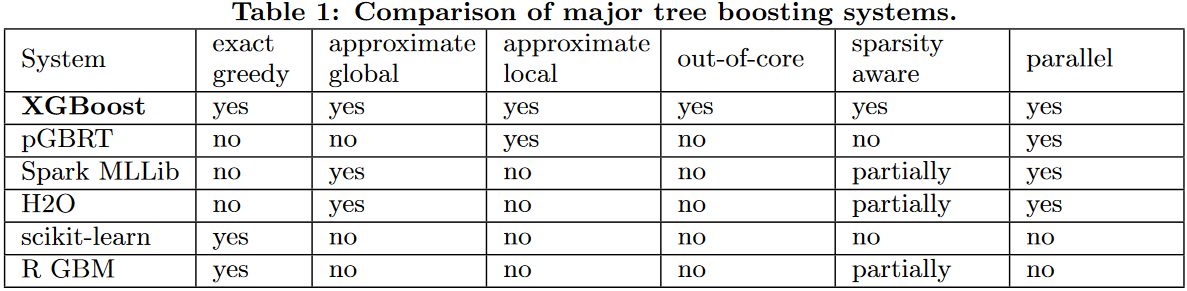

In [3]:
from pyquickhelper.helpgen import NbImage
NbImage("xgboost.png")

Plusieurs améliorations ont été implémentées pour rendre l'apprentissage rapide
et capable de gérer de gros volumes de données :

* **exact greedy :** algorithme standard pour apprendre une forêt aléatoire
* **approximate global :** chaque noeud est un seuil sur une variable, ce seuil est choisi
  parmi toutes les valeurs possibles ou des quantiles, ces quantiles sont fixes pour un arbre
* **approximate local :** ou ces quantiles sont réalustés pour chaque noeud
* **out-of-core :** la librairie compresse les valeurs des variables par colonnes pour réduire l'empreinte
  mémoire
* **sparsity aware :** la librairie tient compte des valeurs manquantes qui ne sont pas traitées
  comme des valeurs comme les autres, chaque noeud d'un arbre possède une direction par défaut 
* **parallel :** certains traitements sont parallélisés



### LightGBM

[LightGBM](https://github.com/Microsoft/LightGBM) est une librairie concurrente de XGBoost développé par Microsoft. Elle tend à s'imposer car elle est plus rapide dans la plupart des cas.

### Exercice 2 : benchmark

Comparer les random forest de XGBoost, LightGBM, scikit-learn sur différents jeux de données synthétiques :

* Classification binaire en petite dimension.
* Classification binaire en grande dimension.
* Classification binaire en grande dimension et sparse features.

Faire de même pour une classification multi-classes et une régression.